<a href="https://colab.research.google.com/github/vivekbharadwaj/Python/blob/master/deepfashion_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 

In [ ]:
from fastai.vision import *
import pandas as pd
import numpy as np
import time, os
from pathlib import Path
import glob

## Read Dataset Files

In [ ]:
data_dir = Path("/content/drive/My Drive/thealternative/product_and_tech/STEP4_product_matching/visual_similarity/deep_fashion_data")

In [ ]:
# get_category_names
anno_path = data_dir.joinpath("Anno_coarse")
with open(anno_path.joinpath('list_category_cloth.txt'), 'r') as f:
    categories = []
    for i, line in enumerate(f.readlines()):
        if i > 1:
            categories.append(line.split(' ')[0])

In [ ]:
len(categories), categories

(50,
 ['Anorak',
  'Blazer',
  'Blouse',
  'Bomber',
  'Button-Down',
  'Cardigan',
  'Flannel',
  'Halter',
  'Henley',
  'Hoodie',
  'Jacket',
  'Jersey',
  'Parka',
  'Peacoat',
  'Poncho',
  'Sweater',
  'Tank',
  'Tee',
  'Top',
  'Turtleneck',
  'Capris',
  'Chinos',
  'Culottes',
  'Cutoffs',
  'Gauchos',
  'Jeans',
  'Jeggings',
  'Jodhpurs',
  'Joggers',
  'Leggings',
  'Sarong',
  'Shorts',
  'Skirt',
  'Sweatpants',
  'Sweatshorts',
  'Trunks',
  'Caftan',
  'Cape',
  'Coat',
  'Coverup',
  'Dress',
  'Jumpsuit',
  'Kaftan',
  'Kimono',
  'Nightdress',
  'Onesie',
  'Robe',
  'Romper',
  'Shirtdress',
  'Sundress'])

In [ ]:
# get image category map
with open(anno_path.joinpath('list_category_img.txt'), 'r') as f:
    images = []
    for i, line in enumerate(f.readlines()):
        if i > 1:
            images.append([word.strip() for word in line.split(' ') if len(word) > 0])

In [ ]:
len(images), images[:20]

(289222,
 [['img/Sheer_Pleated-Front_Blouse/img_00000001.jpg', '3'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000002.jpg', '3'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000003.jpg', '3'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000004.jpg', '3'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000005.jpg', '3'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000006.jpg', '3'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000007.jpg', '3'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000008.jpg', '3'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000009.jpg', '3'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000010.jpg', '3'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000011.jpg', '3'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000012.jpg', '3'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000013.jpg', '3'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000014.jpg', '3'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000015.jpg', '3'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000016.jpg', '3'],
  ['img/Sheer_Pleated-Front_Blo

In [ ]:
#get train, valid, test split
eval_path = data_dir.joinpath("Eval")
with open(eval_path.joinpath('list_eval_partition.txt'), 'r') as f:
    images_partition = []
    for i, line in enumerate(f.readlines()):
        if i > 1:
            images_partition.append([word.strip() for word in line.split(' ') if len(word) > 0])

In [ ]:
len(images_partition), images_partition[:20]

(289222,
 [['img/Sheer_Pleated-Front_Blouse/img_00000001.jpg', 'train'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000002.jpg', 'train'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000003.jpg', 'val'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000004.jpg', 'train'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000005.jpg', 'test'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000006.jpg', 'val'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000007.jpg', 'test'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000008.jpg', 'train'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000009.jpg', 'train'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000010.jpg', 'train'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000011.jpg', 'train'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000012.jpg', 'train'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000013.jpg', 'test'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000014.jpg', 'train'],
  ['img/Sheer_Pleated-Front_Blouse/img_00000015.jpg', 'val'],
  ['img/Sheer_Pleated-Front_Blouse/img_0

In [ ]:
data_df = pd.DataFrame(images, columns=['images', 'category_label'])
partition_df = pd.DataFrame(images_partition, columns=['images', 'dataset'])
data_df.shape, partition_df.shape

((289222, 2), (289222, 2))

In [ ]:
data_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289222 entries, 0 to 289221
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   images          289222 non-null  object
 1   category_label  289222 non-null  object
dtypes: object(2)
memory usage: 44.8 MB


In [ ]:
data_df['category_label'] = data_df['category_label'].astype(int)

In [ ]:
data_df = data_df.merge(partition_df, on='images')

In [ ]:
data_df['dataset'].value_counts()

train    209222
val       40000
test      40000
Name: dataset, dtype: int64

In [ ]:
data_df['category'] = data_df['category_label'].apply(lambda x: categories[int(x) - 1])


In [ ]:
data_df['category_label'].nunique()
# seems like few labels were merged in Dress label

46

In [ ]:
data_df.head()

,images,category_label,dataset,category
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,train,Blouse
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,train,Blouse
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3,val,Blouse
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,train,Blouse
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3,test,Blouse


## check whether images have been loaded

In [ ]:
img_path = data_dir.joinpath("Img")

In [ ]:
img_path.joinpath('img.zip')

PosixPath('/content/drive/My Drive/thealternative/product_and_tech/STEP4_product_matching/visual_similarity/deep_fashion_data/Img/img.zip')

In [ ]:
# !unzip -q "/content/drive/My Drive/thealternative/product_and_tech/STEP4_product_matching/visual_similarity/deep_fashion_data/Img/img.zip" -d "/content/drive/My Drive/thealternative/product_and_tech/STEP4_product_matching/visual_similarity/deep_fashion_data/Img/"

In [ ]:
img_path = data_dir.joinpath("Img").joinpath("img")
str(img_path)

'/content/drive/My Drive/thealternative/product_and_tech/STEP4_product_matching/visual_similarity/deep_fashion_data/Img/img'

In [ ]:
count = 0
for path in img_path.rglob("*.*"):
  count+=1
count  

289259

In [ ]:
count=0
for path in img_path.rglob("*"):
  if 'Sheer_Pleated-Front_Blouse/img_00000001.jpg' in str(path):
    print (path)

/content/drive/My Drive/thealternative/product_and_tech/STEP4_product_matching/visual_similarity/deep_fashion_data/Img/img/Sheer_Pleated-Front_Blouse/img_00000001.jpg


0

## prepare databunch

In [ ]:
img_path = data_dir.joinpath("Img")

In [ ]:
data_source = (ImageList.from_df(df=data_df, path=img_path, cols='images')
                    .split_by_idxs((data_df[data_df['dataset']=='train'].index), (data_df[data_df['dataset']=='val'].index))
                    .label_from_df(cols='category')
              )

In [ ]:
tmfs = get_transforms()

data = data_source.transform(tmfs, size=224).databunch(bs=128).normalize(imagenet_stats)

In [ ]:
test_data = ImageList.from_df(df=data_df[data_df['dataset'] == 'test'], path=img_path, cols='images')
data.add_test(test_data)

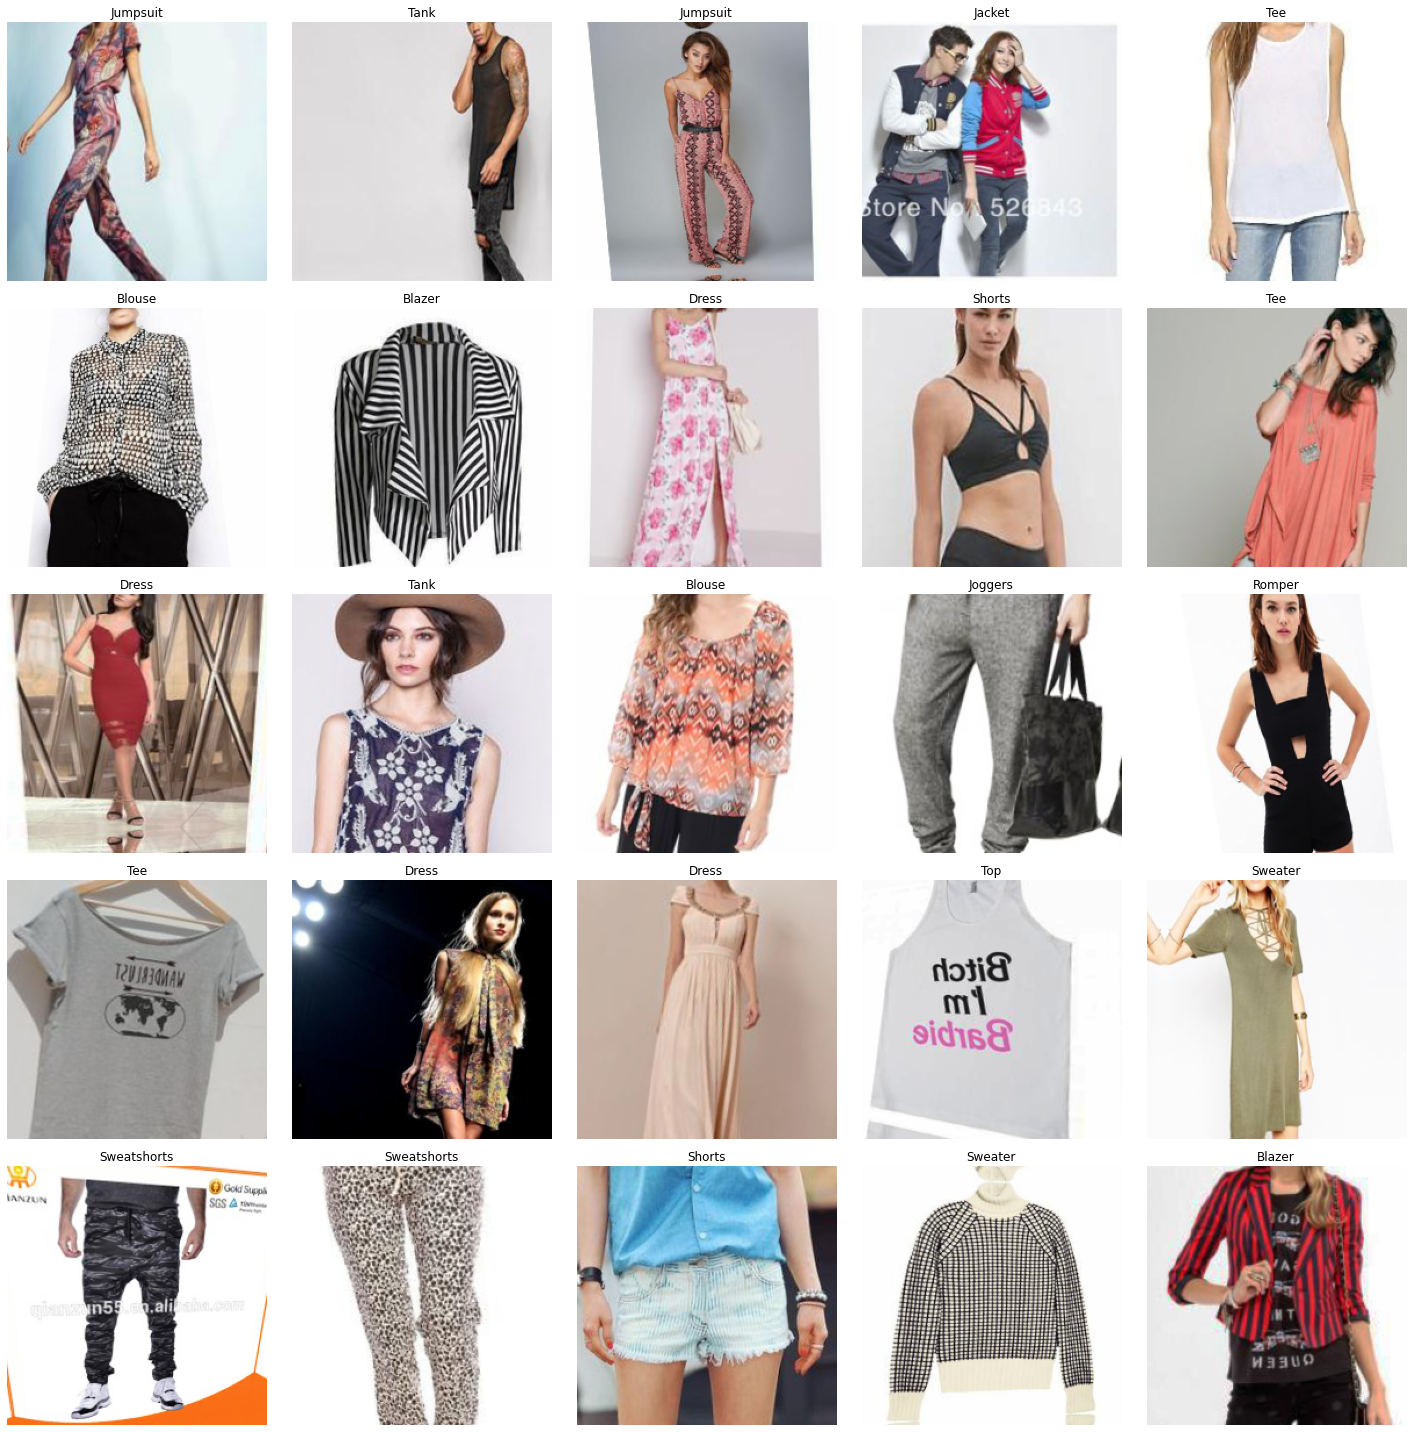

In [ ]:
data.show_batch()

In [ ]:
data

ImageDataBunch;

Train: LabelList (209222 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Blouse,Blouse,Blouse,Blouse,Blouse
Path: /content/drive/My Drive/thealternative/product_and_tech/STEP4_product_matching/visual_similarity/deep_fashion_data/Img;

Valid: LabelList (40000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Blouse,Blouse,Blouse,Blouse,Blouse
Path: /content/drive/My Drive/thealternative/product_and_tech/STEP4_product_matching/visual_similarity/deep_fashion_data/Img;

Test: LabelList (40000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/thealternative/product_and_tech/STEP4_product_matching/visual_similarity/deep_fashion_data/Img

## Finetune resnet 50 model

In [ ]:
from fastai.metrics import accuracy, top_k_accuracy

top_3_accuracy = partial(top_k_accuracy, k=3)
top_5_accuracy = partial(top_k_accuracy, k=5)

In [ ]:
learner = cnn_learner(data, models.resnet50, metrics=[accuracy, top_3_accuracy, top_5_accuracy])
learner.model = torch.nn.DataParallel(learner.model)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


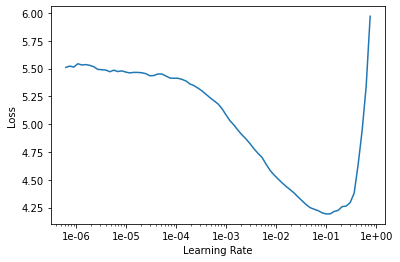

In [ ]:
learner.lr_find()
learner.recorder.plot()

In [ ]:
learner.fit_one_cycle(3, max_lr=1e-03)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,top_k_accuracy,time
0,1.438597,1.313159,0.614900,0.834250,0.905225,46:27
1,1.297356,1.186322,0.649300,0.854800,0.921625,48:47
2,1.232651,1.151320,0.661025,0.861200,0.925200,46:23


In [ ]:
data_dir.joinpath('model')

PosixPath('/content/drive/My Drive/thealternative/product_and_tech/STEP4_product_matching/visual_similarity/deep_fashion_data/model')

In [ ]:
learner.save('resnet50-224-freezed',return_path=True)

PosixPath('/content/drive/My Drive/thealternative/product_and_tech/STEP4_product_matching/visual_similarity/deep_fashion_data/Img/models/resnet50-224-freezed.pth')

In [ ]:
learner.save('/content/drive/My Drive/thealternative/product_and_tech/STEP4_product_matching/visual_similarity/deep_fashion_data/model/resnet50-224-freezed.pth',return_path=True)

PosixPath('/content/drive/My Drive/thealternative/product_and_tech/STEP4_product_matching/visual_similarity/deep_fashion_data/model/resnet50-224-freezed.pth.pth')

In [ ]:
# .module because DataParallel was used
model = learner.model.module

In [ ]:
model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256